In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
figsize_L = (14,12)

In [2]:
freq = '1min'
for i_house in range(1, 7):
    labels_file = 'low_freq/house_{}/labels.dat'.format(i_house)
    labels = pd.read_table(labels_file, sep=' ', index_col=0, header=None)
    labels.columns = ['label']

    list_dfs = []
    for i_channel in labels.index:
        file_name = 'low_freq/house_{}/channel_{}.dat'.format(i_house, i_channel)
        df = pd.read_table(file_name, sep=' ', header=None, index_col=0)
        df.columns = [labels.ix[i_channel, 'label']]
        df = df.set_index(pd.to_datetime(df.index, unit='s'))
        list_dfs.append(df)

    df_house = pd.concat(list_dfs, axis=1)
    df_house = df_house.resample(freq).mean()
    df_house.to_csv('low_freq/house_{}_{}.csv'.format(i_house, freq))

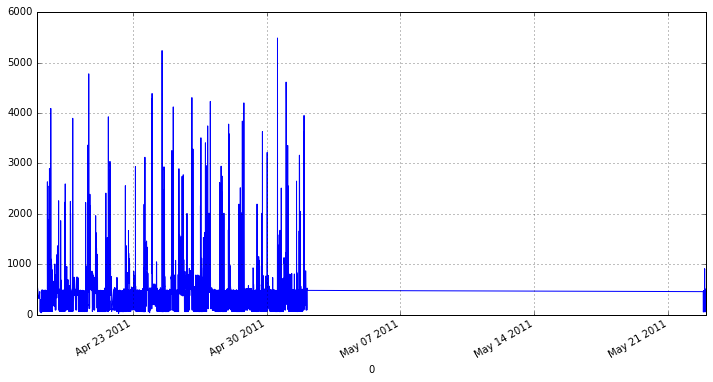

In [37]:
df = pd.read_csv('low_freq/house_2_1min.csv', index_col=0, parse_dates=True)
df_sum = df.sum(1).dropna()
df_sum.plot(figsize=(12,6), grid=True)

In [72]:
df_dow.boxplot?

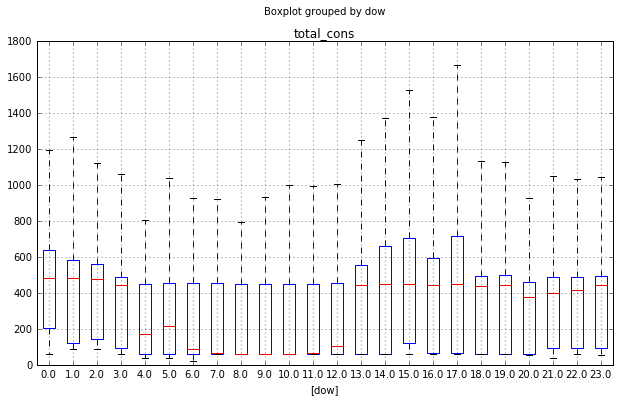

In [74]:
df_dow = pd.DataFrame(np.transpose([df_sum.values, df_sum.index.hour]), index=df_sum.index, columns=['total_cons', 'dow'])
df_dow.boxplot(by='dow', figsize=(10,6), sym='')

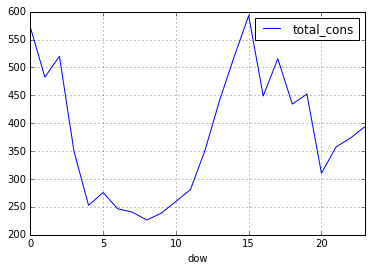

In [75]:
df_dow.groupby('dow').mean().plot(grid=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33713 entries, 2011-05-21 19:39:00 to 2011-06-14 05:31:00
Data columns (total 17 columns):
mains                 26630 non-null float64
mains.1               26630 non-null float64
kitchen_outlets       20331 non-null float64
washer_dryer          20331 non-null float64
stove                 20331 non-null float64
electronics           20331 non-null float64
bathroom_gfi          20331 non-null float64
refrigerator          20331 non-null float64
dishwaser             20331 non-null float64
outlets_unknown       20331 non-null float64
outlets_unknown.1     20331 non-null float64
electric_heat         20331 non-null float64
kitchen_outlets.1     20331 non-null float64
lighting              20331 non-null float64
air_conditioning      20331 non-null float64
air_conditioning.1    20331 non-null float64
air_conditioning.2    20331 non-null float64
dtypes: float64(17)
memory usage: 4.6+ MB


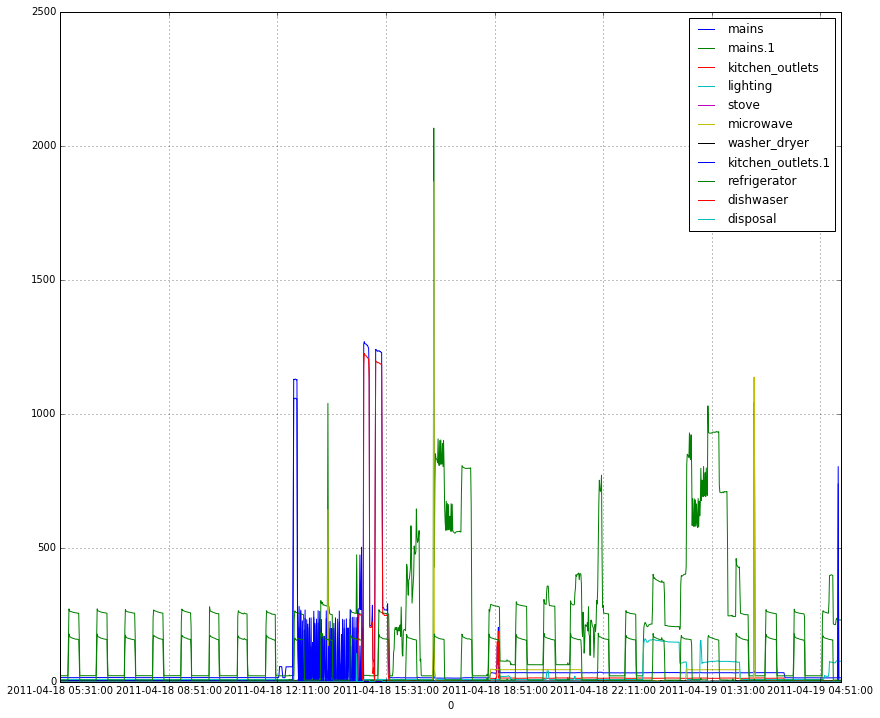

In [27]:
df.dropna().ix[0:60*24,:].plot(figsize=(14,12), grid=True)